In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re

# Function to calculate repetition features
def calculate_repetition_features(text):
    # Count word repetitions
    words = text.split()
    word_count = {word: words.count(word) for word in set(words)}
    word_repetition = sum(count for count in word_count.values() if count > 1)

    # Count letter repetitions
    letter_repetition = len(re.findall(r'(.)\1{2,}', text))  # Counts letters repeated 3 or more times

    return pd.Series([word_repetition, letter_repetition])

# Load your dataset
file_path = 'hf://datasets/ccosme/SentiTaglishProductsAndServices/SentiTaglish_ProductsAndServices.csv'  # Update with your actual file path
dataset_b = pd.read_csv(file_path)

# Assuming 'reviews' and 'sentiments' are the columns in your CSV
X = dataset_b['review']
y = dataset_b['sentiment']

# Extract repetition features
repetition_features = X.apply(calculate_repetition_features)
repetition_features.columns = ['word_repetition', 'letter_repetition']

# Combine repetition features with TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Combine TF-IDF with repetition features into a single DataFrame
import scipy.sparse as sp

X_combined = sp.hstack([X_tfidf, sp.csr_matrix(repetition_features.values)])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.86      0.82       660
           2       0.75      0.05      0.10        55
           3       0.90      0.86      0.88       686
           4       0.75      0.76      0.75       701

    accuracy                           0.81      2102
   macro avg       0.79      0.63      0.64      2102
weighted avg       0.81      0.81      0.80      2102



In [129]:
from sklearn.metrics import accuracy_score

# Assuming y_val are your true labels and y_pred are your predicted labels
accuracy = accuracy_score(y_val, y_pred)

print(f'Accuracy: {accuracy:.2f}')  # Print accuracy rounded to two decimal places

Accuracy: 0.81


Confusion Matrix

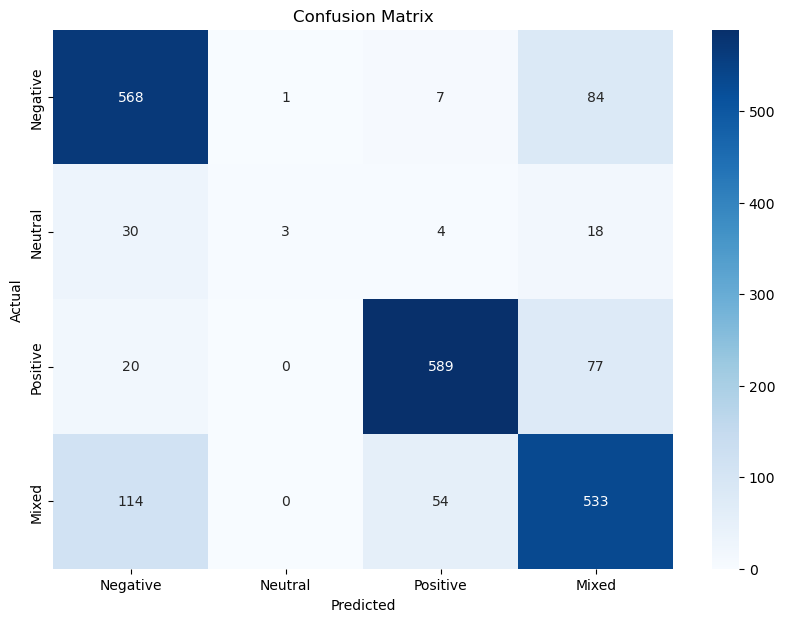

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive', 'Mixed'],
            yticklabels=['Negative', 'Neutral', 'Positive', 'Mixed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Bar Plot of Classification Metrics

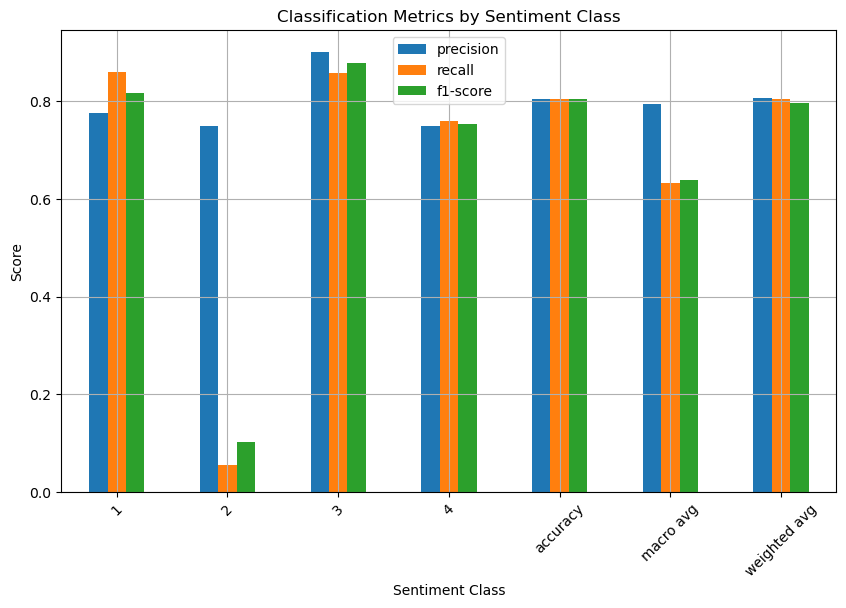

In [133]:
from sklearn.metrics import classification_report

# Get classification report metrics
report = classification_report(y_val, y_pred, output_dict=True)

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame(report).transpose()

# Plot the metrics
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Metrics by Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Distribution of Predicted Sentiments

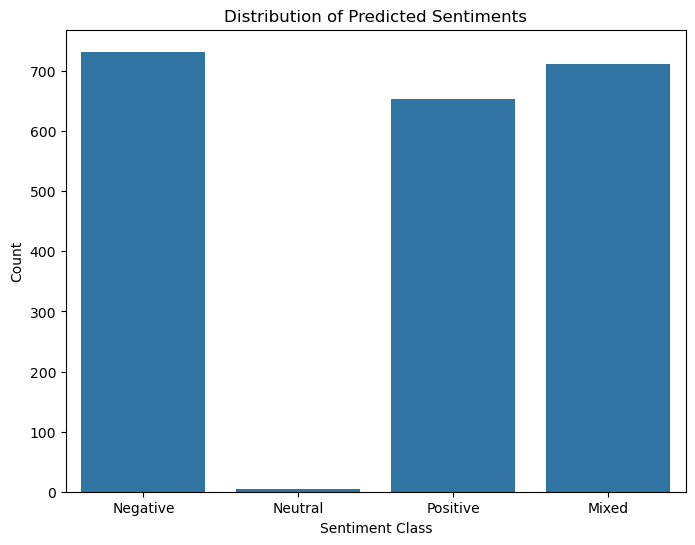

In [135]:
# Create a count plot for predicted sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred)
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Negative', 'Neutral', 'Positive', 'Mixed'])
plt.show()

In [6]:
import joblib

# Save the trained model and vectorizer using joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']